**Exploratory_Data_Analysis_of_Heart_Attack_dataset (Group 4)**

**Problem statement: Predict the Heart Attack.**

<img src="R1c869a28ae9fab052a6098f5dd116af2.png"/>

In [1]:
#<img src="Rd9f97d6cba002ba5561603fdb82deba5.png" sytle= "width:100px;height:200px"/>

IMPORTING LIBRARIES

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier


import matplotlib.pyplot as plt
from collections import Counter
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split


pd.set_option('display.max_columns', None)

In [3]:
# Loading Dataset
df_hrt = pd.read_csv('heart.csv')

In [4]:
df_hrt.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df_hrt.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df_hrt.shape

(303, 14)

In [7]:
df_hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df_hrt.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df_hrt.duplicated().sum()

1

In [10]:
df_hrt.drop_duplicates(inplace=True)

In [11]:
df_hrt.shape

(302, 14)

In [12]:
# Descriptive Statistic Numerical Data
df_hrt.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

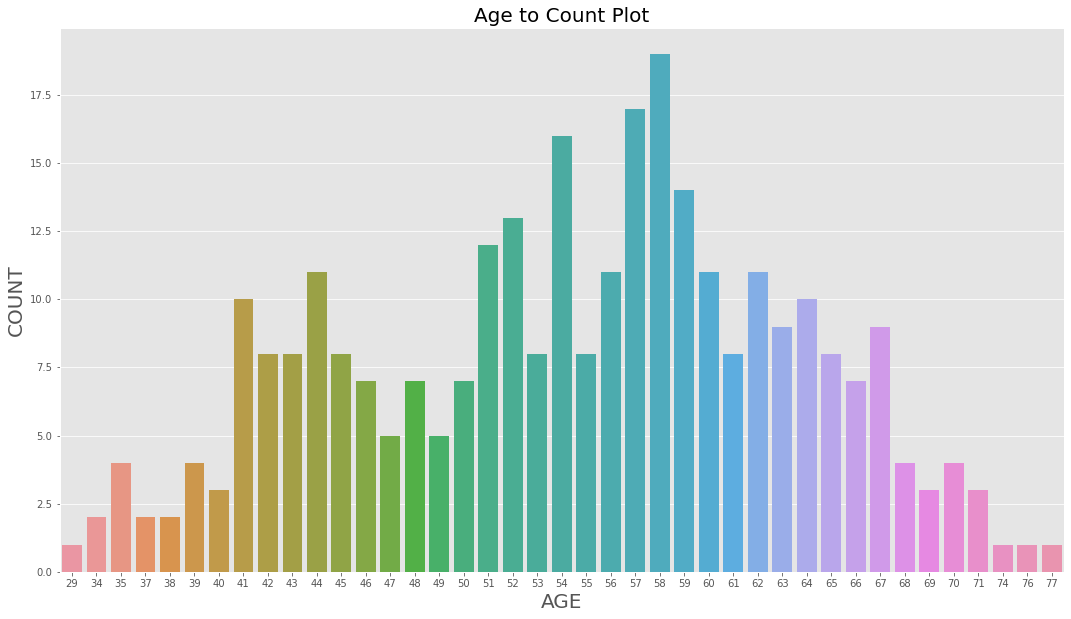

In [13]:
# age to count plot
plt.figure(figsize=(18,10))
plt.style.use("ggplot")
sns.countplot(x=df_hrt["age"])    #using countplot
plt.title("Age to Count Plot",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

People age above 40 and below 68 are more likely to get heart attack. <br>People at the age of 58 are highly prone to heart attacks.

In [14]:
# Male to Female Heart Attack Count

data=df_hrt["sex"].value_counts().reset_index()
px.pie(data,names=["Male","Female"],values='sex',color_discrete_sequence=px.colors.sequential.RdBu)

**Number of males and females in the dataset**

In [15]:
reoutput = {0: 'No heart disease', 1: 'Heart disease'}
df_hrt['output'] = df_hrt['output'].map(reoutput)

fig = px.pie(df_hrt['output'].value_counts().reset_index(), values = 'output', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#8d230f','#1e434c'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Distribution of <br> heart disease <br> in patients', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

Text(0.5, 1.0, 'Percentage of  Females and Males having less or more chance of heart attack')

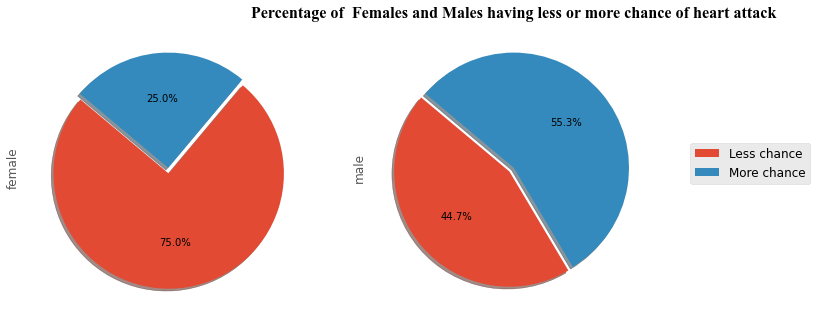

In [16]:
label=["Less chance","More chance"]
df=pd.crosstab(columns=df_hrt["sex"],index=df_hrt["output"],normalize="columns")
df.columns=["female", "male"]
df.index=["",""]
df.plot.pie(subplots=True,explode=(0.05,0),autopct='%1.1f%%', shadow=True, startangle=140, legend=False, figsize=(11, 6))
plt.legend(label, bbox_to_anchor=(1,0.5), loc="center right",fontsize=12,bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.8)
plt.title("Percentage of  Females and Males having less or more chance of heart attack", fontsize=16, fontname="Times New Roman",weight="bold")

**75.3% of the total number of females observed are likely to get heart attack**
<br>**45% of the total number of males observed are likely to get heart attack**

In [17]:
#Male to female likelyhood of obtaining a heart attack

Text(0.5, 1.0, 'Percentage of Females and Males having less or more chance of heart attack')

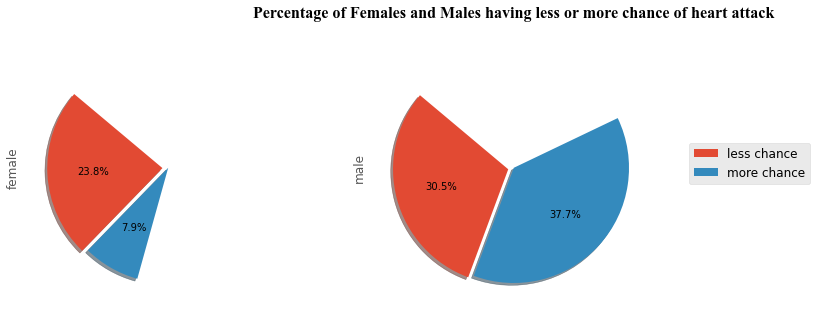

In [18]:
label=["less chance","more chance"]
explode=(0.05,0)
df=pd.crosstab(index=df_hrt["output"],columns=df_hrt["sex"],normalize="all")
df.columns=["female", "male"]
df.index=["",""]
df.plot.pie(subplots=True,explode=explode,autopct='%1.1f%%', shadow=True, startangle=140, legend=False, figsize=(11, 6))
plt.legend(label, bbox_to_anchor=(1,0.5), loc="center right",fontsize=12,bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.8)
plt.title("Percentage of Females and Males having less or more chance of heart attack", 
          fontsize=16, fontname="Times New Roman",weight="bold")

If we look at total population, then approximately 23.2% females and 31.1% males 
<br>of total population have heart attack.
<br>This is because number of males is more than the number of females

<AxesSubplot:xlabel='exng', ylabel='count'>

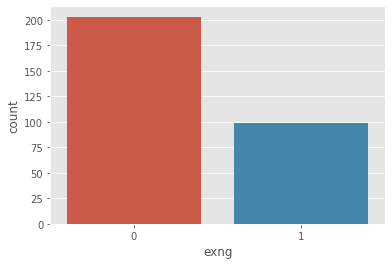

In [20]:
sns.countplot("exng",data=df_hrt)

**Angina due to exercise is probable, indicating that exercise can cause angina.**


In [21]:
# Chest pain type and patient count
chest_pain_count=df_hrt["cp"].value_counts().reset_index()
chest_pain_count

,index,cp
0,0,143
1,2,86
2,1,50
3,3,23


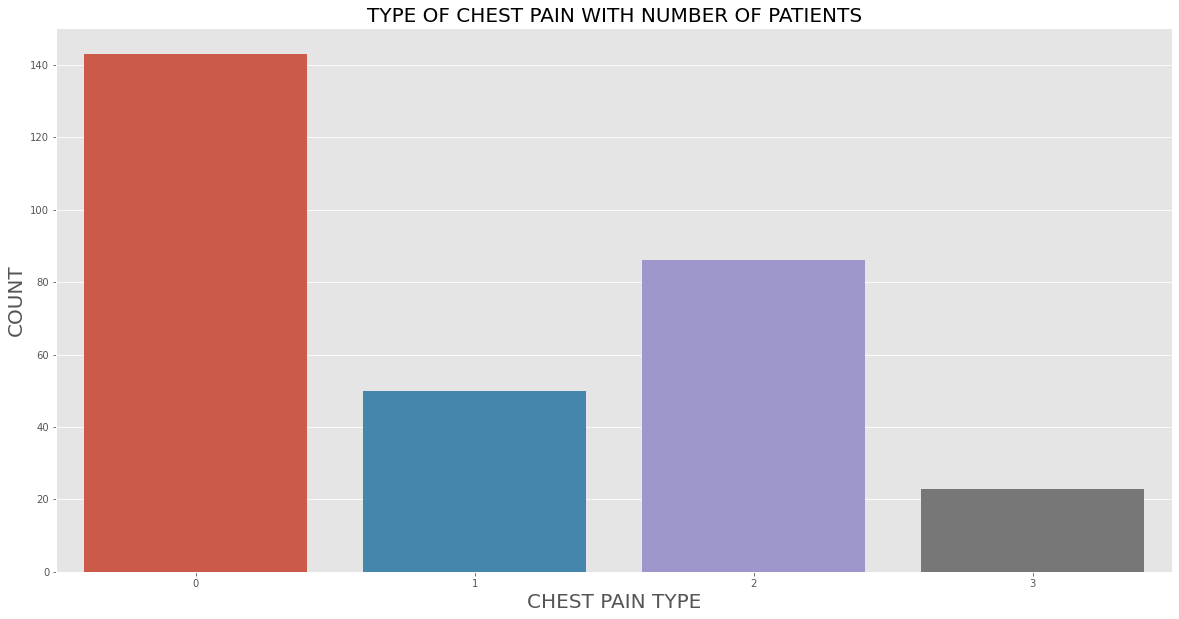

In [22]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.barplot(x=chest_pain_count["index"],y=chest_pain_count["cp"])   
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS",fontsize=20)
plt.xlabel("CHEST PAIN TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

**There are basically four types of chest pain.<br>Most of the people are suffering from 'typical angina' type chest pain**

Angina pectoris or typical angina is the discomfort that is noted when <br>the heart does not get enough blood or oxygen.
Typically, this is caused by blockage or plaque buildup<br> in the coronary arteries.
Usually, angina is a symptom that may feel like a tightness<br> or heaviness in the central chest. 
<br>It may be associated with shortness of breath and perspiration.
Angina may occur during activities such as climbing stairs, 
<br>carrying groceries, or becoming upset, angry, or going outside into the cold air. 
<br>Exercise and sexual activity may also cause the symptom to occur.

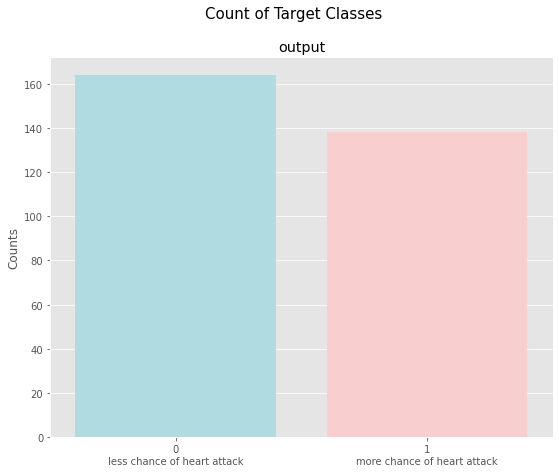

In [23]:
fig, axes = plt.subplots(figsize=(9, 7))

sns.countplot(
    x = 'output',
    data = df_hrt,
    palette = ['#a6e3e9', '#ffc7c7'],
    ax = axes
)
fig.suptitle('Count of Target Classes', size=15)
axes.set_xlabel('')
axes.set_ylabel('Counts')
axes.set_title('output')
axes.set_xticklabels(['0\nless chance of heart attack', '1\nmore chance of heart attack'])
plt.show()

<Figure size 1440x720 with 0 Axes>

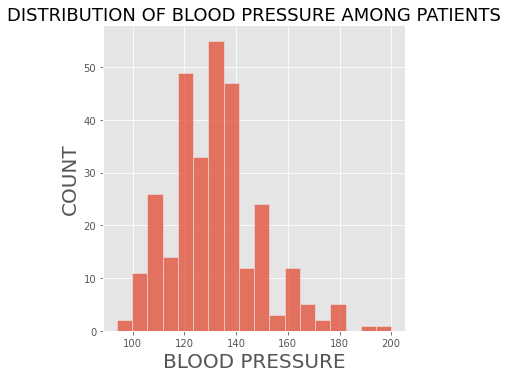

In [24]:
# Blood Pressure distribution among patients
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(df_hrt["trtbps"])   #using displot here
plt.title("DISTRIBUTION OF BLOOD PRESSURE AMONG PATIENTS",fontsize=18)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

In [ ]:
# Cholestrol distribution vs patients count
plt.figure(figsize=(40,60))
plt.style.use("ggplot")
sns.set_color_codes()
sns.displot(df_hrt["chol"],color="green")
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AMONG PATIENTS",fontsize=18)
plt.xlabel("CHOLESTROL LEVEL",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

<Figure size 1440x720 with 0 Axes>

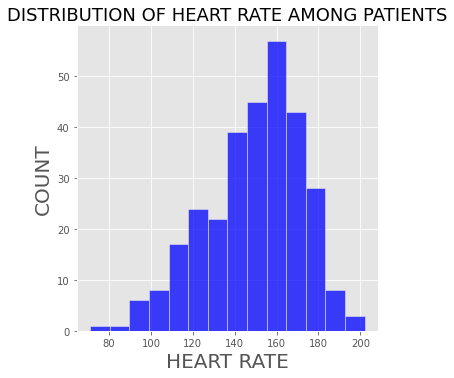

In [25]:
# Heart rate vs patient count
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(df_hrt["thalachh"],color="blue")
plt.title("DISTRIBUTION OF HEART RATE AMONG PATIENTS",fontsize=18)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

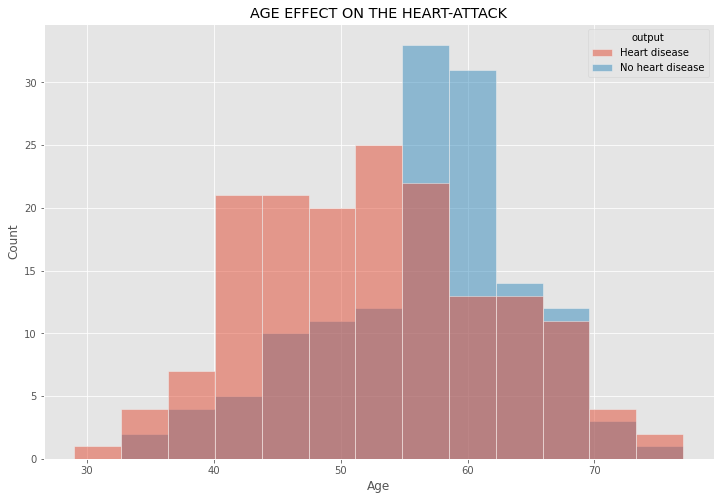

In [26]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.histplot(data = df_hrt, x = 'age', hue = 'output')
plt.title("AGE EFFECT ON THE HEART-ATTACK")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

##### Inference
<ul>
    <li>In general, 49 to 65 aged people have more chance of heart attack.</li>
    <li>Most Common Chest Pain - Non-anginal type</li>
    <li>Resting Blood Pressure - range of 120 to 140</li>
    <li>Cholesterol level - 200 to 260</li>
    </ul>

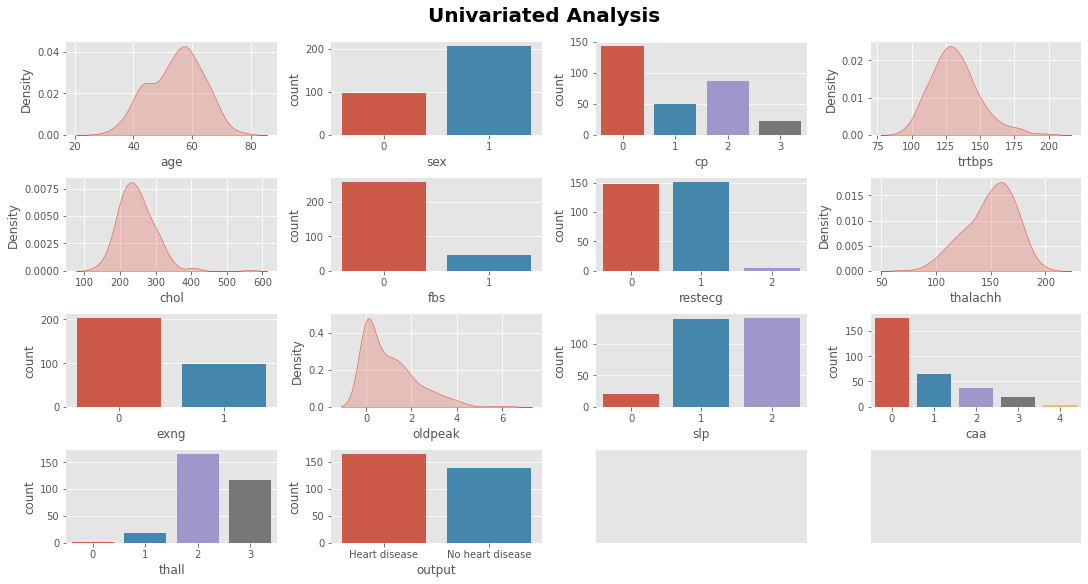

In [27]:
fig, ax = plt.subplots(ncols=4, nrows=4 ,figsize=(15,8), constrained_layout=True )
ax=ax.flatten()
plt.suptitle("Univariated Analysis", size=20, weight='bold')
for i,a in enumerate(df_hrt.columns):
    if df_hrt[a].nunique() >5:
        sns.kdeplot(x=df_hrt[a],ax=ax[i], fill=True)
    else:
        sns.countplot(data=df_hrt, x=a, ax=ax[i])
    for s in ['left','right','top','bottom']:
        ax[i].spines[s].set_visible(False)
        ax[14].spines[s].set_visible(False)
        ax[15].spines[s].set_visible(False)
    ax[14].set_yticks([])
    ax[15].set_yticks([])
    ax[14].set_xticks([])
    ax[15].set_xticks([])

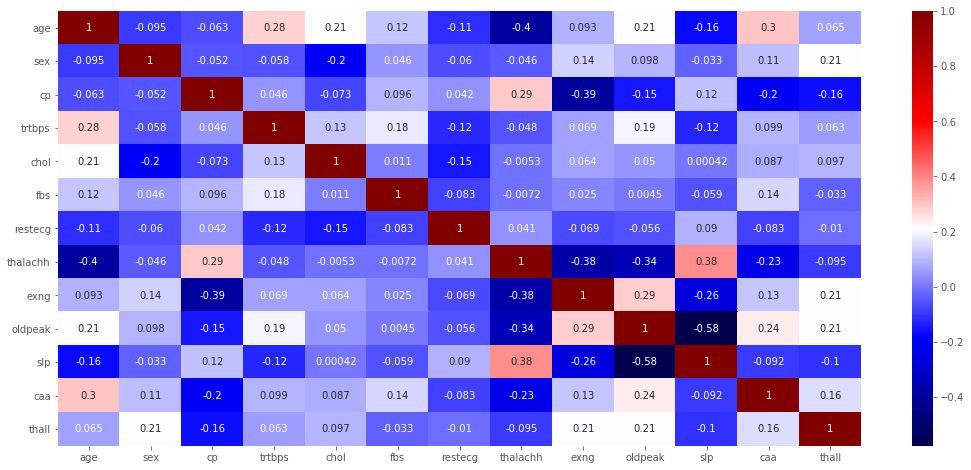

In [29]:
fig, axes = plt.subplots(figsize=(18, 8))

sns.heatmap(
    data = df_hrt.corr(),
    cmap='seismic',
    annot = True,
    ax = axes
)

plt.show()

 **Multivariate Analysis**
   <br> - according to the heatmap, there are few features that have a fairly large positive correlation with output, 
   <br>such as cp, thalachh, and slp.
    <br>- according to the heatmap, there are few features that have a fairly large negative correlation with output,
    <br>such as exng, oldpeak, and caa.

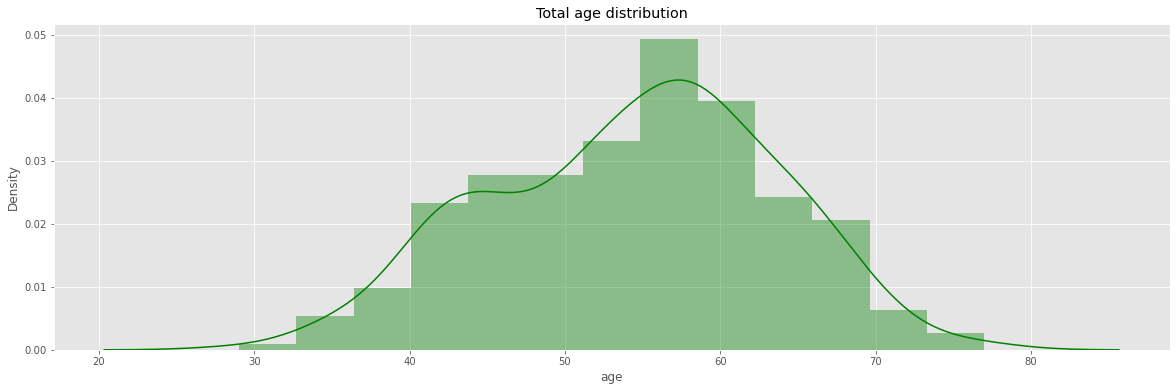

In [28]:
#Distribution plots
plt.figure(figsize=(20,6))
sns.distplot(df_hrt["age"],color="green",bins="auto")
plt.title("Total age distribution")
plt.show()

ax= px.histogram(df_hrt,x= "age", template= "plotly_dark",color= "output",title='Output 0 or 1')
ax.show()

ax= px.histogram(df_hrt,x= "age", template= "plotly_dark",color= "sex",title='Male vs Female age distribution')
ax.show()